In [136]:
from datetime import datetime
from metloom.pointdata import SnotelPointData
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
from shapely.geometry import Point


In [138]:
# get stations for the Skagit Basin
# Find your area
#sf_path = Path("./data/outline.shp").expanduser()
sf_path = "./Data/GIS/SkagitRiver_BasinBoundary.json"
sf = gpd.read_file(str(sf_path))
#sf["name"] = ["Skagit"]
variables = [SnotelPointData.ALLOWED_VARIABLES.SNOWDEPTH]


In [139]:
# What does the area look like

sf.explore()

In [140]:
# Find all the points in the area for our variables
points = SnotelPointData.points_from_geometry(sf, variables)
print(len(points))
# This is an iterator
print(type(points))
# It contains the points in a `points` attribute
print(points.points)

9
<class 'metloom.pointdata.base.PointDataCollection'>
[SnotelPointData('1319:WA:SNTL', 'Decline Creek'), SnotelPointData('991:WA:SNTL', 'Hozomeen Camp'), SnotelPointData('998:WA:SNTL', 'Easy Pass'), SnotelPointData('817:WA:SNTL', 'Thunder Basin'), SnotelPointData('1080:WA:SNTL', 'Brown Top'), SnotelPointData('990:WA:SNTL', 'Beaver Pass'), SnotelPointData('711:WA:SNTL', 'Rainy Pass'), SnotelPointData('975:WA:SNTL', 'Swamp Creek'), SnotelPointData('999:WA:SNTL', 'Marten Ridge')]


In [141]:
# buffer - add buffer (in degrees) to extents

#print(SnotelPointData.points_from_geometry(sf, variables, buffer=0.5).points)

# within_geometry - doesn't do anything since our geometry is already a square

#print(SnotelPointData.points_from_geometry(sf, variables, within_geometry=False).points)

In [142]:
# Make a static plot of the points
# turn that iterator into a dataframe
df = points.to_dataframe()
# look at what is in the dataframe
df.head(10)


,name,id,datasource,geometry
0,Decline Creek,1319:WA:SNTL,NRCS,POINT Z (-121.45500 48.23594 4480.00000)
1,Hozomeen Camp,991:WA:SNTL,NRCS,POINT Z (-121.07976 48.98075 1690.00000)
2,Easy Pass,998:WA:SNTL,NRCS,POINT Z (-121.43895 48.85933 5270.00000)
3,Thunder Basin,817:WA:SNTL,NRCS,POINT Z (-120.98950 48.52753 4320.00000)
4,Brown Top,1080:WA:SNTL,NRCS,POINT Z (-121.19713 48.92755 5830.00000)
5,Beaver Pass,990:WA:SNTL,NRCS,POINT Z (-121.25550 48.87930 3630.00000)
6,Rainy Pass,711:WA:SNTL,NRCS,POINT Z (-120.73580 48.51865 4890.00000)
7,Swamp Creek,975:WA:SNTL,NRCS,POINT Z (-120.78267 48.57142 3930.00000)
8,Marten Ridge,999:WA:SNTL,NRCS,POINT Z (-121.69823 48.76292 3520.00000)


In [143]:
def remove_z(geom):
    if geom.is_empty:
        return geom
    else:
        return Point(geom.x, geom.y)


In [144]:

df.geometry = df.geometry.apply(remove_z)
print(df)


            name            id datasource                     geometry
0  Decline Creek  1319:WA:SNTL       NRCS  POINT (-121.45500 48.23594)
1  Hozomeen Camp   991:WA:SNTL       NRCS  POINT (-121.07976 48.98075)
2      Easy Pass   998:WA:SNTL       NRCS  POINT (-121.43895 48.85933)
3  Thunder Basin   817:WA:SNTL       NRCS  POINT (-120.98950 48.52753)
4      Brown Top  1080:WA:SNTL       NRCS  POINT (-121.19713 48.92755)
5    Beaver Pass   990:WA:SNTL       NRCS  POINT (-121.25550 48.87930)
6     Rainy Pass   711:WA:SNTL       NRCS  POINT (-120.73580 48.51865)
7    Swamp Creek   975:WA:SNTL       NRCS  POINT (-120.78267 48.57142)
8   Marten Ridge   999:WA:SNTL       NRCS  POINT (-121.69823 48.76292)


In [116]:
#df = df.set_crs("EPSG:4326")

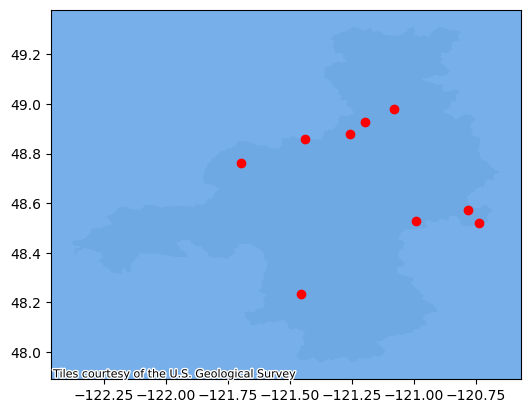

In [148]:

ax = sf.to_crs("EPSG:4326").plot(alpha=0.1)
ax = df.plot(ax=ax, color="red")
ctx.add_basemap(
    ax,
    #source=ctx.providers.OpenStreetMap.Mapnik,
    source=ctx.providers.USGS.USTopo,
    crs=df.crs,
    zoom=5
)